# Importing Packages

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

# Defining paths

In [2]:
train_path='../input/my-nsfw-dataset/train/train/'

In [3]:
nsfw=os.listdir(train_path+'NSFW/')
sfw=os.listdir(train_path+'SFW/')
test_path='../input/my-nsfw-dataset/test/test/'
test=os.listdir(test_path)

# Importing VGG-16 Pretrained model

In [4]:
vgg16 = tf.keras.applications.VGG16(include_top=False)
preprocess_input = tf.keras.applications.vgg16.preprocess_input
image = tf.keras.preprocessing.image

58892288/58889256 [==============================] - 1s 0us/step


In [5]:
batch_size=20

# Extracting Features

In [6]:
def extract_features(img_paths, batch_size=batch_size):

    global vgg16
    n = len(img_paths)
    img_array = np.zeros((n, 300, 300, 3))
    
    for i, path in enumerate(img_paths):
        img = image.load_img(path, target_size=(300, 300))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        x = preprocess_input(img)
        img_array[i] = x
    
    X = vgg16.predict(img_array, batch_size=batch_size, verbose=1)
    X = X.reshape(n, 512, -1)
    return X


In [7]:
X = extract_features(
    list(map(lambda x: train_path + 'NSFW/' + x, nsfw)) + list(map(lambda x: train_path + 'SFW/' + x, sfw))
) 
y = np.array([1] * len(nsfw) + [0] * len(sfw))

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:2858: DecompressionBombWarning: Image size (147659204 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


74/74 [==============================] - 20s 130ms/step


In [8]:
X_test = extract_features(
    list(map(lambda x: test_path + x, test))
)
y_test = np.array([1] * len(nsfw) + [0] * len(sfw))

10/10 [==============================] - 1s 104ms/step


# Training the model

In [9]:
def train():
    model = tf.keras.models.Sequential([ 
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dropout(0.2), 

      tf.keras.layers.Dense(1, activation='sigmoid')

    ])
    return model

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
np.random.seed(42)

epochs = 20

model = train()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test,y_test),
                    batch_size=batch_size,
                    epochs=epochs)

Epoch 1/20
59/59 [==============================] - 1s 17ms/step - loss: 22.1401 - accuracy: 0.8338 - val_loss: 8.8982 - val_accuracy: 0.9133
Epoch 2/20
59/59 [==============================] - 1s 9ms/step - loss: 2.0782 - accuracy: 0.9617 - val_loss: 9.4227 - val_accuracy: 0.9187
Epoch 3/20
59/59 [==============================] - 1s 9ms/step - loss: 1.0974 - accuracy: 0.9772 - val_loss: 10.7018 - val_accuracy: 0.9187
Epoch 4/20
59/59 [==============================] - 1s 10ms/step - loss: 0.5727 - accuracy: 0.9899 - val_loss: 10.0328 - val_accuracy: 0.9268
Epoch 5/20
59/59 [==============================] - 1s 9ms/step - loss: 0.1877 - accuracy: 0.9971 - val_loss: 8.7737 - val_accuracy: 0.9322
Epoch 6/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0077 - accuracy: 0.9999 - val_loss: 10.1684 - val_accuracy: 0.9295
Epoch 7/20
59/59 [==============================] - 0s 8ms/step - loss: 0.1058 - accuracy: 0.9972 - val_loss: 9.6885 - val_accuracy: 0.9241
Epoch 8/20
59/

# Training and Loss Graph

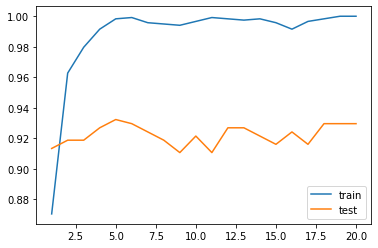

In [13]:
plt.plot(range(1,epochs+1), history.history['accuracy'], label='train')
plt.plot(range(1,epochs+1), history.history['val_accuracy'], label='test')
plt.legend()

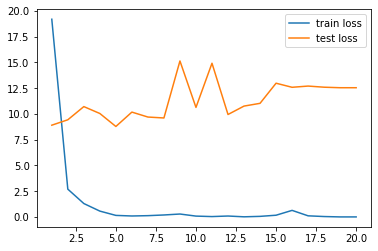

In [14]:
plt.plot(range(1,epochs+1), history.history['loss'], label='train loss')
plt.plot(range(1,epochs+1), history.history['val_loss'], label='test loss')
plt.legend()

# Prediction

In [15]:
import cv2

# Detecting Nude image

In [16]:
X_test = extract_features(
    list(map(lambda x: '../input/my-nsfw-dataset/test/test/NSFW (2).jpg' , test))
)

10/10 [==============================] - 1s 103ms/step


In [17]:
y_pred = model.predict(X_test)
if(y_pred>0.5).all():
    print("This image is not safe to use and it depicts Nudity")
elif(y_pred<0.5).all():
    print("Safe to use")
else:
    print("Invalid Image")

This image is not safe to use and it depicts Nudity


**Our model has detected it accurately as Nudity. The image can't be displayed here as it is a sensual content**

In [18]:
#save .h5 model
model.save('model_nudity_detection.h5')

In [19]:
#save model .pb
export_dir = 'saved_model_nudity'
tf.saved_model.save(model, export_dir)

In [20]:
!ls ./

__notebook__.ipynb  model_nudity_detection.h5  saved_model_nudity


In [21]:
#ubah ke zip
!zip -r ./saved_model_nudity.zip ./saved_model_nudity

  adding: saved_model_nudity/ (stored 0%)
  adding: saved_model_nudity/variables/ (stored 0%)
  adding: saved_model_nudity/variables/variables.index (deflated 59%)
  adding: saved_model_nudity/variables/variables.data-00000-of-00001 (deflated 35%)
  adding: saved_model_nudity/assets/ (stored 0%)
  adding: saved_model_nudity/saved_model.pb (deflated 87%)


In [22]:
import os

file_stat = os.stat('model_nudity_detection.h5')
print(file_stat.st_size)

509660112


In [23]:
#link for download file
from IPython.display import FileLink

FileLink(r'./saved_model_nudity.zip')

/kaggle/working/saved_model_nudity.zip

# Safe Image

**These are the safe images that we use for testing**

TypeError: Image data of dtype object cannot be converted to float

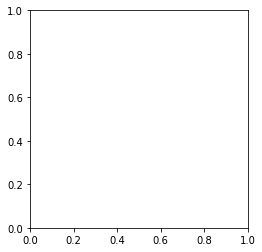

In [24]:
plt.imshow(cv2.imread('../input/safeee/s1.jpg'))

In [ ]:
plt.imshow(cv2.imread('../input/safeee/s2.jpg'))

In [ ]:
X_test = extract_features(
    list(map(lambda x: '../input/safeee/s1.jpg' , test))
)

In [ ]:
y_pred = model.predict(X_test)
if(y_pred>0.5).all():
    print("This image is not safe to use and it depicts Nudity")
elif(y_pred<0.5).all():
    print("Safe to use")
else:
    print("Invalid Image")

In [ ]:
X_test = extract_features(
    list(map(lambda x: '../input/safeee/s2.jpg' , test))
)

In [ ]:
y_pred = model.predict(X_test)
if(y_pred>0.5).all():
    print("This image is not safe to use and it depicts Nudity")
elif(y_pred<0.5).all():
    print("Safe to use")
else:
    print("Invalid Image")

**Model tells that the above two images are safe images which is precise.**

# Overall our model predicts accurately with an accuracy of around 93%